![](https://i.imgur.com/UHbrtdO.png)

## Janata Hack - E Commerce Analytics ML Model

#### Contents

- Problem Statement.
- Import Packages
- Loading Dataset
- Data Pre-Processing
- Basic EDA 
- Model Building
- Model Evaluation 
- Prediction on Test Data
- Submissions

## Problem Statement - 

Prediction of User Gender,as the E commerce market is growing and it's necessary to tap in the User Data to enhance their customer services, to provide better product predictions which in turn will help the company to grow in terms of customer base and profit. Hence User Details are very much required. Having said that, we will be working on prediction of gender where we are provided with a set of Categorical Columns to work with.If you are looking for how to handle categorical variables this is a good start !


* In the dataset, Column ProductList Contains products seperated by ( ; ) and which in turn every product has a category, sub category and sub sub category which are seperated by (/) you can refer the notebook to understand clearly.



- ##### Columns
   - session_id   :       Object
   - startTime    :       Object
   - endTime      :       Object 
   - ProductList  :       Object
   - gender       :       Object

### Import Packages here - 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from catboost import Pool, CatBoostClassifier, cv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

### Importing Training Data And Test Data 

In [2]:
train_df = pd.read_csv('train_8wry4cB.csv')
test_df = pd.read_csv('test_Yix80N0.csv')

target = train_df['gender'].copy() ## Target !
display(train_df.head())
display(test_df.head())
display(target.head())


#Displaying Train Data !
#Displaying Test Data !
#Displaying Target Column !

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


0    female
1      male
2    female
3    female
4      male
Name: gender, dtype: object

### Data Info

In [3]:
train_df.dtypes

session_id     object
startTime      object
endTime        object
ProductList    object
gender         object
dtype: object

In [4]:
test_df.dtypes

session_id     object
startTime      object
endTime        object
ProductList    object
dtype: object

In [5]:
train_df.describe()

,session_id,startTime,endTime,ProductList,gender
count,10500,10500,10500,10500,10500
unique,10500,8815,8803,9402,2
top,u22790,19/12/14 8:57,14/11/14 16:15,A00002/B00002/C00007/D00266/,female
freq,1,5,5,25,8192


We Have a biased dataset, as you can see in the Gender Column we have 8192 observations only for females. Alongwith, we have 9402 unique products out of which one product has been viewed the most like by 25 users. Also there are users which were viewing same prodcuts at the same time.

In [6]:
test_df.describe()

,session_id,startTime,endTime,ProductList
count,4500,4500,4500,4500
unique,4500,4203,4144,4207
top,u15727,06/12/14 10:49,21/11/14 15:29,A00002/B00002/C00007/D00266/
freq,1,3,4,14


In this also, you can see we have the same product viewed maximum number of times.

### Data Preprocessing

In [7]:
X = train_df.copy()
X_test = test_df.copy()

In [8]:
#Dropping Gender and Session_id Columns.

X.drop(['session_id', 'gender'], axis = 1, inplace = True)
X_test.drop(['session_id'], axis = 1, inplace = True)
display(X.head())
display(X_test.head())


,startTime,endTime,ProductList
0,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...
1,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...
2,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/
3,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...
4,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...


,startTime,endTime,ProductList
0,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


In [9]:
# call this to get group of product codes for each user_id

def product_group(x):
    prod_list = []
    for i in x.split(';'):
        prod_list.append(i.split('/')[-2])
    return prod_list



In [10]:
# call this to fetch the most frequent D code used.
def frequency(List): 
    return max(set(List), key = List.count)


# Extracting the D codes. 
def final_items(x):
    prod_code = []
    for i in x:
        prod_code.append(i[:4])
    return frequency(prod_code)

In [11]:
def CleanIt(data):

    #-----------------------------------PRODUCTS------------------------------------------
    data['Category_A'] = data['ProductList'].apply(lambda x : x.split(';')[0].split('/')[0])
    data['Category_B'] = data['ProductList'].apply(lambda x : x.split(';')[0].split('/')[1])
    data['Category_C'] = data['ProductList'].apply(lambda x : x.split(';')[0].split('/')[2])
    
    #Calling Function on ProductList to populate Product table.
    data['Items'] =  data['ProductList'].apply(lambda x: product_group(x))
    data['Product Code'] = data['Items'].apply(lambda x: final_items(x))
    data['Total_Products_Viewed'] = data['ProductList'].apply(lambda x: len(x.split(';'))) 
    
    #-------------------------------- TIME--------------------------------------------------
                
    data['startTime'] = pd.to_datetime(data['startTime'], format = "%d/%m/%y %H:%M")
    data['endTime']   = pd.to_datetime(data['endTime'], format = "%d/%m/%y %H:%M")
    data['StartHour'] = data['startTime'].dt.hour
    data['StartMinute'] = data['startTime'].dt.minute
    data['EndHour'] = data['endTime'].dt.hour
    data['EndMinute'] = data['endTime'].dt.minute
    data['Duration_InSeconds']  = (data['endTime']-data['startTime'])/np.timedelta64(1,'s')
    
    
    return data 
    
    



In [12]:
trainset = X.copy()
testset = X_test.copy()
trainset = CleanIt(trainset)
testset = CleanIt(testset)
print("----------------------------- Info on Processed Training Data--------------------")
display(trainset.shape)
display(trainset.dtypes)
display(trainset.describe())
display(trainset.info())
display(trainset.head())
print("******************************Info on Processed Testing Data***********************")
display(testset.shape)
display(testset.dtypes)
display(testset.describe())
display(testset.info())
display(testset.head())

----------------------------- Info on Processed Training Data--------------------


(10500, 14)

startTime                datetime64[ns]
endTime                  datetime64[ns]
ProductList                      object
Category_A                       object
Category_B                       object
Category_C                       object
Items                            object
Product Code                     object
Total_Products_Viewed             int64
StartHour                         int64
StartMinute                       int64
EndHour                           int64
EndMinute                         int64
Duration_InSeconds              float64
dtype: object

,Total_Products_Viewed,StartHour,StartMinute,EndHour,EndMinute,Duration_InSeconds
count,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,1.050000e+04
mean,2.214381,14.188857,29.678286,14.211333,29.603143,7.408063e+03
std,2.311911,5.123027,17.218832,5.119898,17.229317,1.078842e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,10.000000,15.000000,10.000000,15.000000,0.000000e+00
50%,1.000000,14.000000,30.000000,14.000000,30.000000,0.000000e+00
75%,2.000000,19.000000,44.000000,19.000000,44.000000,1.200000e+02
max,36.000000,23.000000,59.000000,23.000000,59.000000,2.956140e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   startTime              10500 non-null  datetime64[ns]
 1   endTime                10500 non-null  datetime64[ns]
 2   ProductList            10500 non-null  object        
 3   Category_A             10500 non-null  object        
 4   Category_B             10500 non-null  object        
 5   Category_C             10500 non-null  object        
 6   Items                  10500 non-null  object        
 7   Product Code           10500 non-null  object        
 8   Total_Products_Viewed  10500 non-null  int64         
 9   StartHour              10500 non-null  int64         
 10  StartMinute            10500 non-null  int64         
 11  EndHour                10500 non-null  int64         
 12  EndMinute              10500 non-null  int64         
 13  D

None

,startTime,endTime,ProductList,Category_A,Category_B,Category_C,Items,Product Code,Total_Products_Viewed,StartHour,StartMinute,EndHour,EndMinute,Duration_InSeconds
0,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,A00002,B00003,C00006,"[D28435, D02554, D28436, D28437]",D284,4,18,11,18,12,60.0
1,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,A00001,B00009,C00031,"[D29404, D02617, D29407, D29410, D29411, D2544...",D294,7,14,35,14,41,360.0
2,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,A00002,B00001,C00020,[D16944],D169,1,15,58,15,58,0.0
3,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,A00002,B00004,C00018,"[D10284, D10285, D10286]",D102,3,2,57,3,0,180.0
4,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,A00001,B00001,C00012,"[D30805, D30806]",D308,2,16,44,16,46,120.0


******************************Info on Processed Testing Data***********************


(4500, 14)

startTime                datetime64[ns]
endTime                  datetime64[ns]
ProductList                      object
Category_A                       object
Category_B                       object
Category_C                       object
Items                            object
Product Code                     object
Total_Products_Viewed             int64
StartHour                         int64
StartMinute                       int64
EndHour                           int64
EndMinute                         int64
Duration_InSeconds              float64
dtype: object

,Total_Products_Viewed,StartHour,StartMinute,EndHour,EndMinute,Duration_InSeconds
count,4500.000000,4500.000000,4500.00000,4500.000000,4500.000000,4.500000e+03
mean,2.267556,14.201111,29.62400,14.224889,29.668000,8.785840e+03
std,2.407103,5.068216,17.35562,5.074165,17.298203,1.236620e+05
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00
25%,1.000000,10.000000,15.00000,10.000000,15.000000,0.000000e+00
50%,1.000000,14.000000,30.00000,14.000000,30.000000,0.000000e+00
75%,3.000000,19.000000,45.00000,19.000000,45.000000,1.200000e+02
max,43.000000,23.000000,59.00000,23.000000,59.000000,3.045120e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   startTime              4500 non-null   datetime64[ns]
 1   endTime                4500 non-null   datetime64[ns]
 2   ProductList            4500 non-null   object        
 3   Category_A             4500 non-null   object        
 4   Category_B             4500 non-null   object        
 5   Category_C             4500 non-null   object        
 6   Items                  4500 non-null   object        
 7   Product Code           4500 non-null   object        
 8   Total_Products_Viewed  4500 non-null   int64         
 9   StartHour              4500 non-null   int64         
 10  StartMinute            4500 non-null   int64         
 11  EndHour                4500 non-null   int64         
 12  EndMinute              4500 non-null   int64         
 13  Dur

None

,startTime,endTime,ProductList,Category_A,Category_B,Category_C,Items,Product Code,Total_Products_Viewed,StartHour,StartMinute,EndHour,EndMinute,Duration_InSeconds
0,2014-12-08 13:36:00,2014-12-08 13:36:00,A00002/B00003/C00006/D19956/,A00002,B00003,C00006,[D19956],D199,1,13,36,13,36,0.0
1,2014-12-19 13:52:00,2014-12-19 13:52:00,A00002/B00005/C00067/D02026/,A00002,B00005,C00067,[D02026],D020,1,13,52,13,52,0.0
2,2014-12-01 10:44:00,2014-12-01 10:44:00,A00002/B00002/C00004/D12538/,A00002,B00002,C00004,[D12538],D125,1,10,44,10,44,0.0
3,2014-12-08 20:19:00,2014-12-08 20:22:00,A00002/B00003/C00079/D22781/;A00002/B00003/C00...,A00002,B00003,C00079,"[D22781, D22782, D19325, D22786]",D227,4,20,19,20,22,180.0
4,2014-12-15 19:33:00,2014-12-15 19:33:00,A00002/B00001/C00010/D23419/,A00002,B00001,C00010,[D23419],D234,1,19,33,19,33,0.0


In [13]:
#Dropping Unecessary Columns now - ProductList and Items.

trainset.drop(['ProductList', 'Items', 'startTime', 'endTime'], axis = 1 , inplace = True)
testset.drop(['ProductList', 'Items', 'startTime','endTime'], axis = 1, inplace = True)
display(trainset.head())
display(testset.head())

,Category_A,Category_B,Category_C,Product Code,Total_Products_Viewed,StartHour,StartMinute,EndHour,EndMinute,Duration_InSeconds
0,A00002,B00003,C00006,D284,4,18,11,18,12,60.0
1,A00001,B00009,C00031,D294,7,14,35,14,41,360.0
2,A00002,B00001,C00020,D169,1,15,58,15,58,0.0
3,A00002,B00004,C00018,D102,3,2,57,3,0,180.0
4,A00001,B00001,C00012,D308,2,16,44,16,46,120.0


,Category_A,Category_B,Category_C,Product Code,Total_Products_Viewed,StartHour,StartMinute,EndHour,EndMinute,Duration_InSeconds
0,A00002,B00003,C00006,D199,1,13,36,13,36,0.0
1,A00002,B00005,C00067,D020,1,13,52,13,52,0.0
2,A00002,B00002,C00004,D125,1,10,44,10,44,0.0
3,A00002,B00003,C00079,D227,4,20,19,20,22,180.0
4,A00002,B00001,C00010,D234,1,19,33,19,33,0.0


## *************************************** Basic EDA ****************************************************

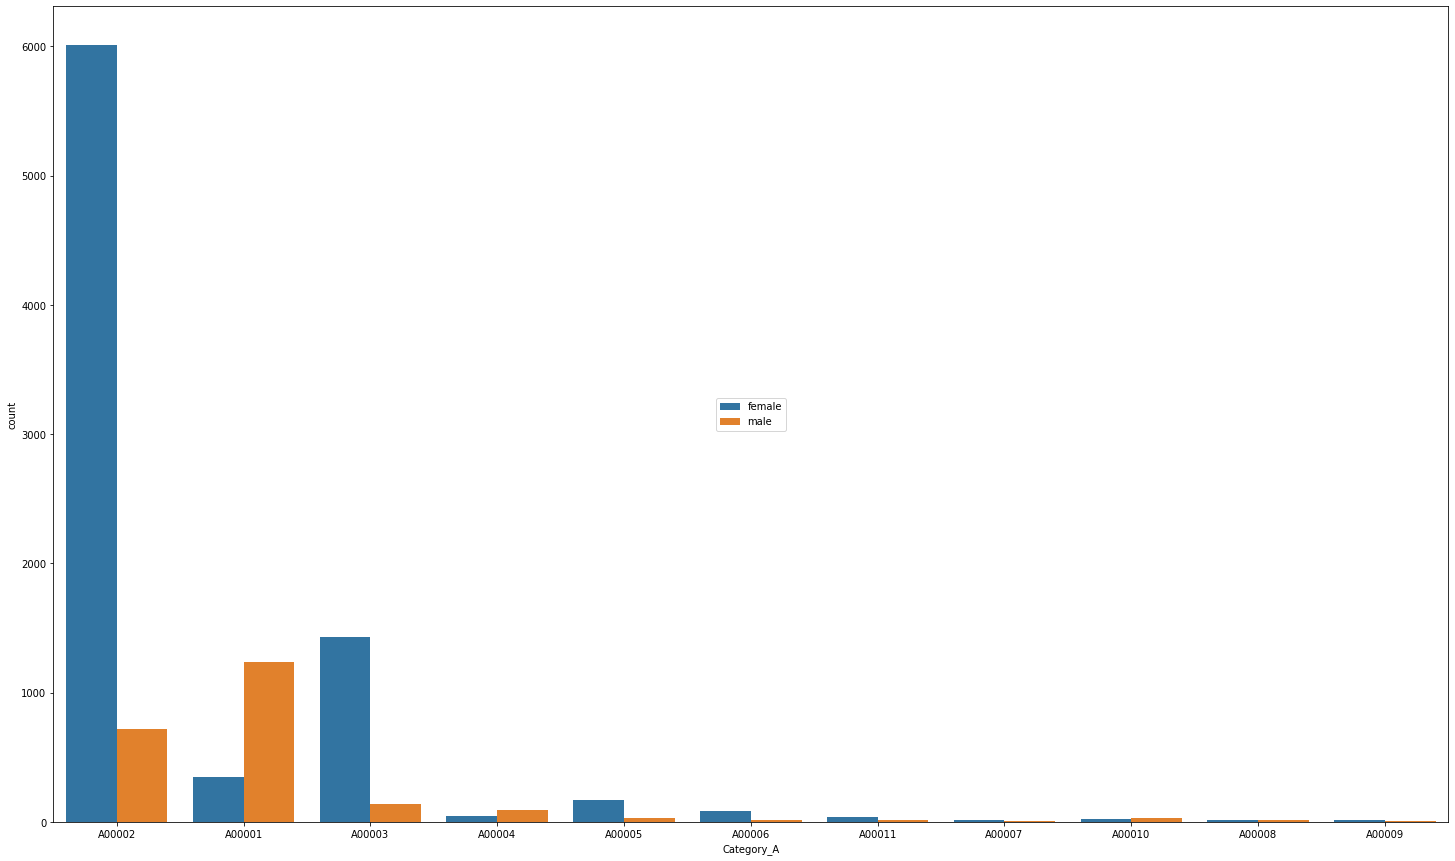

In [14]:
trainset1 = trainset.copy()
trainset1['gender'] = train_df['gender'].copy()
plt.figure(figsize=(25,15))
sns.countplot('Category_A', data = trainset1, hue = 'gender')
plt.legend(loc = 'center')

#### As, you can see clearly category 'A00002' is mostly preferred category, among females. Whereas Category 'A00001' is favoured by mostly males

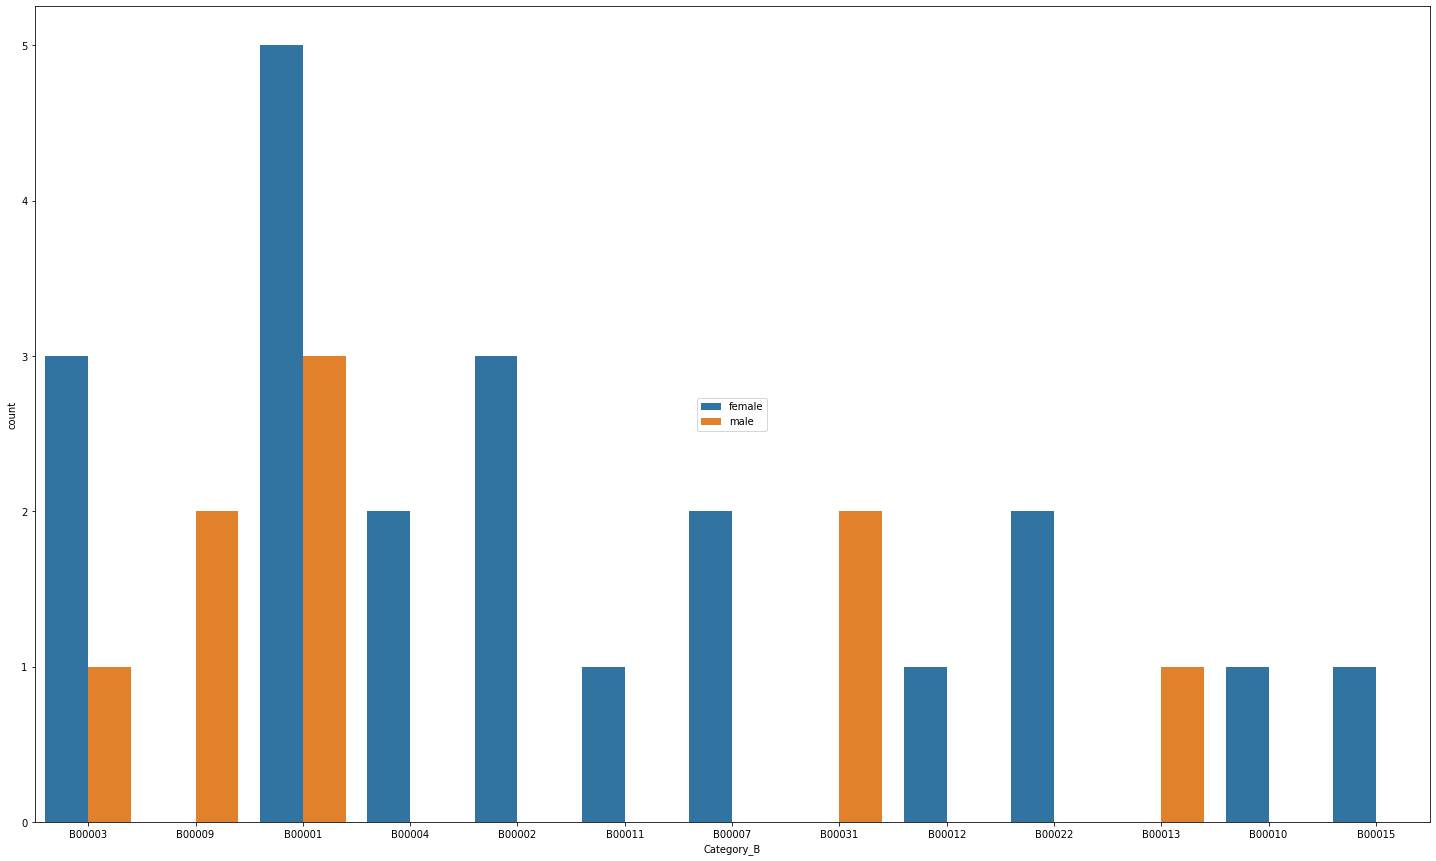

In [15]:
plt.figure(figsize=(25,15))
sns.countplot('Category_B', data = trainset1.head(30), hue = 'gender')
plt.legend(loc = 'center')

#### As, you can see clearly category 'B00001' is mostly preferred category, amongst  females. Also Category 'B00001' is favoured by mostly males, but Category 'B00031' is also preferred by males over female users.

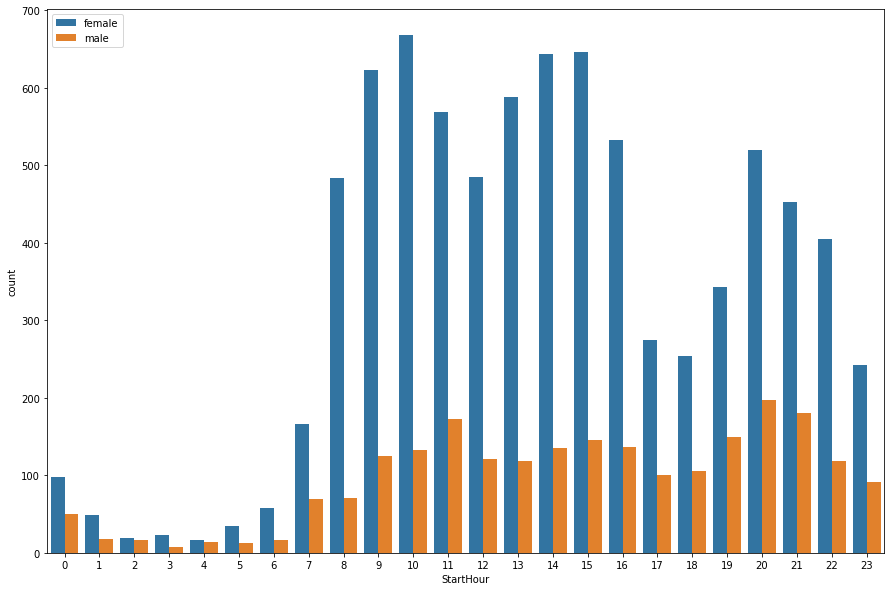

In [16]:
plt.figure(figsize=(15,10))
sns.countplot('StartHour', data = trainset1, hue = 'gender')
plt.legend(loc = 'upper left')

#### Most Viewership by females is in hour 10th of the day, whereas males prefer pretty late in 20th hour.

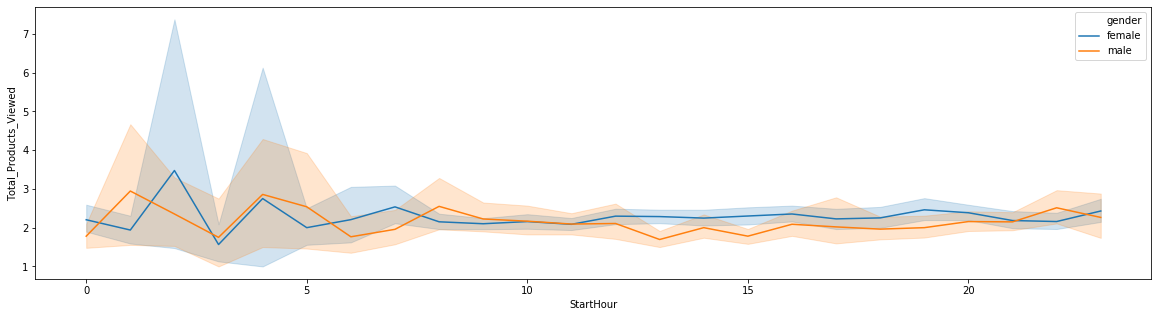

In [17]:
plt.figure(figsize=(20,5))
sns.lineplot(x='StartHour', y = 'Total_Products_Viewed', data = trainset1, hue = 'gender')

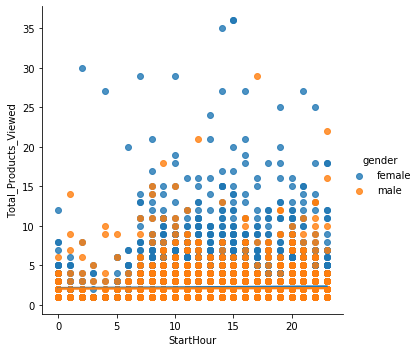

In [18]:
sns.lmplot(x='StartHour', y = 'Total_Products_Viewed', data = trainset1, hue = 'gender')

### Let's Analyse How much reliable customers website have based on time spend amd Viewed Products

In [19]:
display(trainset1.Duration_InSeconds.describe())
display(trainset1.Duration_InSeconds.max())
display(trainset1.Duration_InSeconds.min())

count    1.050000e+04
mean     7.408063e+03
std      1.078842e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.200000e+02
max      2.956140e+06
Name: Duration_InSeconds, dtype: float64

2956140.0

0.0

#### For Males.

,Duration_InSeconds,Total_Products_Viewed
1465,1260.0,29
6142,1020.0,22
6042,660.0,21
3816,720.0,18
3099,720.0,16
...,...,...
4489,0.0,1
4487,0.0,1
4484,0.0,1
4480,60.0,1


,Duration_InSeconds,Total_Products_Viewed
5304,0.0,1
6156,0.0,1
6152,0.0,1
6136,0.0,1
6125,0.0,1
...,...,...
70,1426800.0,2
3251,1634640.0,2
4242,1825860.0,3
8286,1869180.0,3


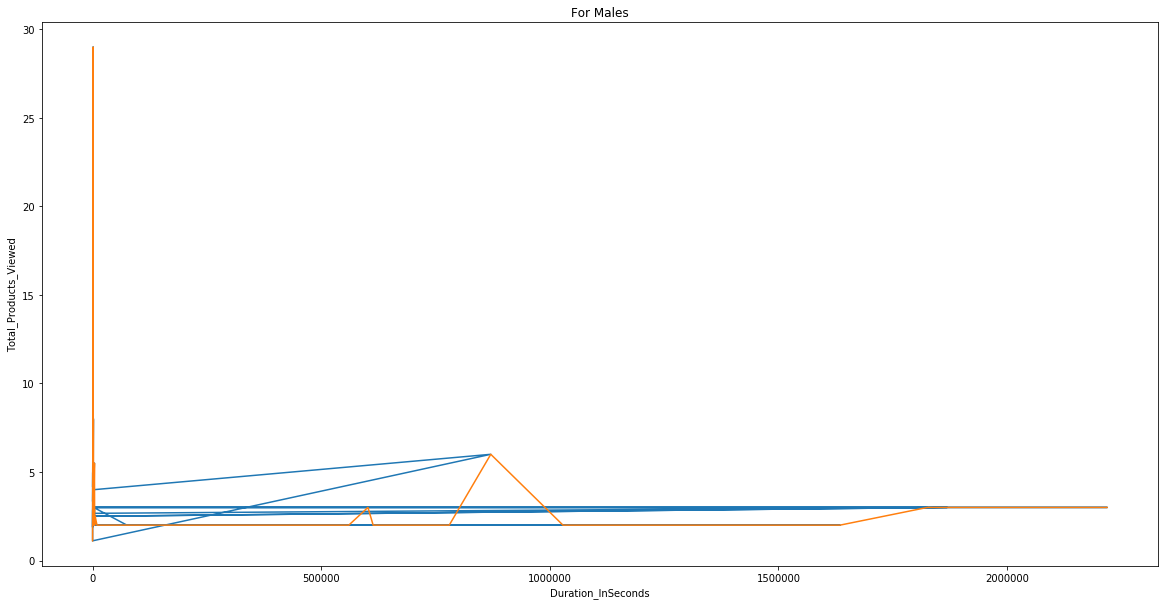

In [25]:
#You will Get a warning message if you try to index this group with Multiple Keys. Avoid it by passing keys into a list.

group_AvgTimeSpend = trainset1.groupby('gender')[['Duration_InSeconds','Total_Products_Viewed']]

#For Males.
group_male = pd.DataFrame(group_AvgTimeSpend.get_group('male'))
display(group_male.sort_values('Total_Products_Viewed', ascending=False))
t1 = group_male.sort_values('Total_Products_Viewed', ascending=False)
plt.figure(figsize=(20,10))
sns.lineplot(x='Duration_InSeconds', y = 'Total_Products_Viewed', sort = False, data = t1)
plt.title('For Males')
display(group_male.sort_values('Duration_InSeconds', ascending = True))
t2 = group_male.sort_values('Duration_InSeconds', ascending = True)
sns.lineplot(x='Duration_InSeconds', y = 'Total_Products_Viewed', sort = False, data = t2)

##### For Females : 

,Duration_InSeconds,Total_Products_Viewed
9548,1680.0,36
2449,600.0,36
8623,1620.0,35
4611,960.0,30
7910,1200.0,29
...,...,...
3269,0.0,1
3267,0.0,1
3266,0.0,1
6498,0.0,1


,Duration_InSeconds,Total_Products_Viewed
5230,0.0,1
7796,0.0,1
7795,0.0,1
7791,0.0,1
3964,0.0,1
...,...,...
8048,2548620.0,3
3662,2590680.0,3
7402,2632380.0,2
1560,2847360.0,2


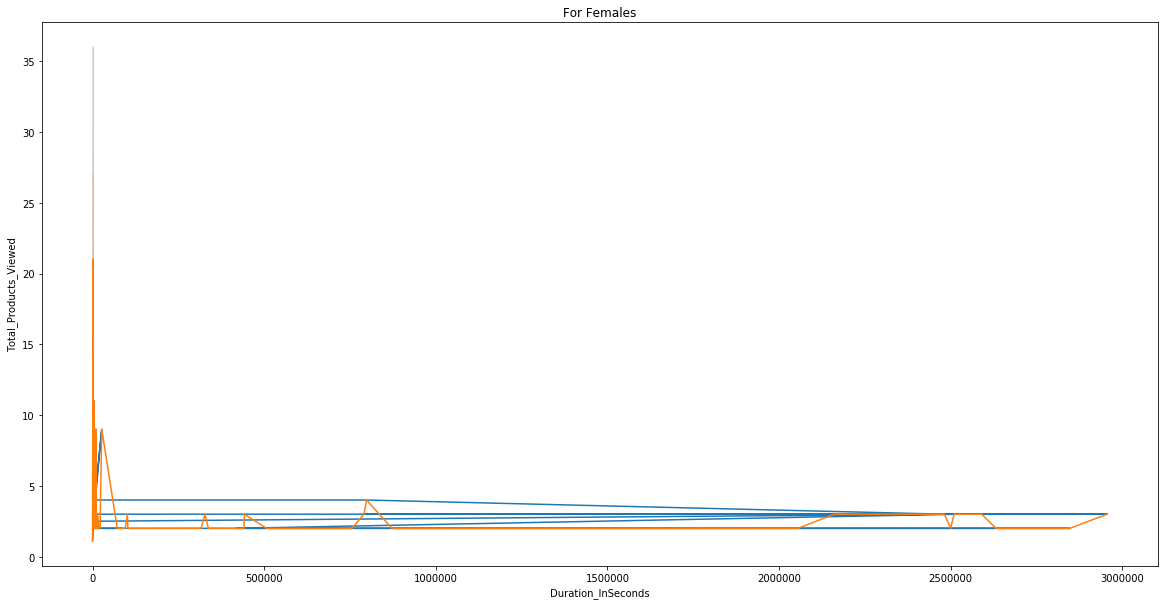

In [36]:
group_female = pd.DataFrame(group_AvgTimeSpend.get_group('female'))
display(group_female.sort_values('Total_Products_Viewed', ascending=False))
t3 = group_female.sort_values('Total_Products_Viewed', ascending=False)
plt.figure(figsize=(20,10))
sns.lineplot(x='Duration_InSeconds', y = 'Total_Products_Viewed', sort = False, data = t3)
plt.title('For Females')
display(group_female.sort_values('Duration_InSeconds', ascending = True))
t4 = group_female.sort_values('Duration_InSeconds', ascending = True)
sns.lineplot(x='Duration_InSeconds', y = 'Total_Products_Viewed', sort = False, data = t4)


#### For Both ------------------------------------- Analysing Viewing Behaviour----------------------------------------------------

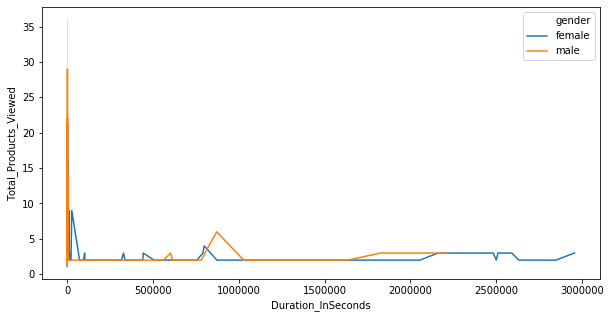

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Duration_InSeconds', y = 'Total_Products_Viewed', data = trainset1, hue = 'gender')

#### Basic Analysis.

Clearly from the above lineplot you can say that the females users are pretty slow in decision making,as compared to males because the product viewing sessions are long for a few number of products for females. Whereas, males have viewed good number of product in limited time. Hence Female Users Spend more time on the Website than males. So company will have more viewership if invested in products frequently bought and viewed by females, provided such products have been put up to the caraousel.

## Model Building****

* We will be using CatBoostClassifier as for training the data and later on we will check how it is performing on the test set. Evaluation and Accuracy will be checked for the model. As, we have Categorical Variables to be dealt with so going with CatBoostClassifier will be good enough, as Catboost handles the Categorical features directly, no explicit OHE or encoding scheme is required.


- trainset (Training Data) 
- testset  (Prediction Data)

In [27]:
print(trainset.shape, testset.shape)

(10500, 10) (4500, 10)


In [28]:
display(trainset.head())
display(trainset.dtypes)
display(testset.head())
display(trainset.dtypes)


,Category_A,Category_B,Category_C,Product Code,Total_Products_Viewed,StartHour,StartMinute,EndHour,EndMinute,Duration_InSeconds
0,A00002,B00003,C00006,D284,4,18,11,18,12,60.0
1,A00001,B00009,C00031,D294,7,14,35,14,41,360.0
2,A00002,B00001,C00020,D169,1,15,58,15,58,0.0
3,A00002,B00004,C00018,D102,3,2,57,3,0,180.0
4,A00001,B00001,C00012,D308,2,16,44,16,46,120.0


Category_A                object
Category_B                object
Category_C                object
Product Code              object
Total_Products_Viewed      int64
StartHour                  int64
StartMinute                int64
EndHour                    int64
EndMinute                  int64
Duration_InSeconds       float64
dtype: object

,Category_A,Category_B,Category_C,Product Code,Total_Products_Viewed,StartHour,StartMinute,EndHour,EndMinute,Duration_InSeconds
0,A00002,B00003,C00006,D199,1,13,36,13,36,0.0
1,A00002,B00005,C00067,D020,1,13,52,13,52,0.0
2,A00002,B00002,C00004,D125,1,10,44,10,44,0.0
3,A00002,B00003,C00079,D227,4,20,19,20,22,180.0
4,A00002,B00001,C00010,D234,1,19,33,19,33,0.0


Category_A                object
Category_B                object
Category_C                object
Product Code              object
Total_Products_Viewed      int64
StartHour                  int64
StartMinute                int64
EndHour                    int64
EndMinute                  int64
Duration_InSeconds       float64
dtype: object

#### As You can see training data and Testing data are in same order, required for CatBoostClassifier to be in  correct order.

In [157]:
#### MODEL 

cate_features_index = np.where(trainset.dtypes != float)[0]
X1_train, X1_test, y1_train, y1_test = train_test_split(trainset, target, train_size=0.85,random_state=1200)
from catboost import CatBoostClassifier


cat = CatBoostClassifier(eval_metric='Accuracy',
                         use_best_model=True,random_seed=40,loss_function='MultiClass',
                         learning_rate = 0.670 ,iterations = 700,depth = 4,
                         bagging_temperature=3,one_hot_max_size=2)



#Parameters to be tuned :- 
#1. learning Rate
#2. Training Size(As data is biased)
#3. Iterations
#4. OHE size
#5. depth of tree

#### Model Evaluation ----

In [158]:
cat.fit(X1_train,y1_train ,cat_features=cate_features_index,eval_set=(X1_test,y1_test),use_best_model=True)
print('the test accuracy is :{:.6f}'.format(accuracy_score(y1_test,cat.predict(X1_test))))
predcat = cat.predict(X1_test)
print("----------------------------------------------------------------------------")
print('Training set score: {:.4f}'.format(cat.score(X1_train, y1_train)))
print('Test set score: {:.4f}'.format(cat.score(X1_test, y1_test)))


matrix = confusion_matrix(y1_test, predcat)
print("--------------------------------------------------------------------------------------------")
print('Confusion matrix\n\n', matrix)
print('\nTrue Positives(TP) Females  = ', matrix[0,0])
print('\nTrue Negatives(TN)  Males = ', matrix[1,1])
print('\nFalse Positives(FP) = ', matrix[0,1])
print('\nFalse Negatives(FN) = ', matrix[1,0])

0:	learn: 0.8654342	test: 0.8882540	best: 0.8882540 (0)	total: 50.2ms	remaining: 35.1s
1:	learn: 0.8649860	test: 0.8888889	best: 0.8888889 (1)	total: 62.4ms	remaining: 21.8s
2:	learn: 0.8649860	test: 0.8882540	best: 0.8888889 (1)	total: 76.5ms	remaining: 17.8s
3:	learn: 0.8657703	test: 0.8876190	best: 0.8888889 (1)	total: 89.2ms	remaining: 15.5s
4:	learn: 0.8654342	test: 0.8876190	best: 0.8888889 (1)	total: 98.9ms	remaining: 13.7s
5:	learn: 0.8656583	test: 0.8882540	best: 0.8888889 (1)	total: 114ms	remaining: 13.1s
6:	learn: 0.8654342	test: 0.8895238	best: 0.8895238 (6)	total: 125ms	remaining: 12.4s
7:	learn: 0.8655462	test: 0.8888889	best: 0.8895238 (6)	total: 136ms	remaining: 11.8s
8:	learn: 0.8653221	test: 0.8888889	best: 0.8895238 (6)	total: 149ms	remaining: 11.4s
9:	learn: 0.8657703	test: 0.8882540	best: 0.8895238 (6)	total: 157ms	remaining: 10.8s
10:	learn: 0.8659944	test: 0.8876190	best: 0.8895238 (6)	total: 168ms	remaining: 10.5s
11:	learn: 0.8659944	test: 0.8876190	best: 0.889

98:	learn: 0.8793277	test: 0.8920635	best: 0.8971429 (43)	total: 1.75s	remaining: 10.7s
99:	learn: 0.8797759	test: 0.8914286	best: 0.8971429 (43)	total: 1.77s	remaining: 10.6s
100:	learn: 0.8797759	test: 0.8920635	best: 0.8971429 (43)	total: 1.79s	remaining: 10.6s
101:	learn: 0.8795518	test: 0.8914286	best: 0.8971429 (43)	total: 1.8s	remaining: 10.6s
102:	learn: 0.8792157	test: 0.8933333	best: 0.8971429 (43)	total: 1.82s	remaining: 10.6s
103:	learn: 0.8794398	test: 0.8926984	best: 0.8971429 (43)	total: 1.83s	remaining: 10.5s
104:	learn: 0.8792157	test: 0.8920635	best: 0.8971429 (43)	total: 1.86s	remaining: 10.5s
105:	learn: 0.8794398	test: 0.8914286	best: 0.8971429 (43)	total: 1.88s	remaining: 10.6s
106:	learn: 0.8794398	test: 0.8907937	best: 0.8971429 (43)	total: 1.89s	remaining: 10.5s
107:	learn: 0.8797759	test: 0.8914286	best: 0.8971429 (43)	total: 1.92s	remaining: 10.5s
108:	learn: 0.8791036	test: 0.8914286	best: 0.8971429 (43)	total: 1.93s	remaining: 10.5s
109:	learn: 0.8791036	te

195:	learn: 0.8875070	test: 0.8901587	best: 0.8971429 (43)	total: 3.44s	remaining: 8.85s
196:	learn: 0.8872829	test: 0.8895238	best: 0.8971429 (43)	total: 3.46s	remaining: 8.85s
197:	learn: 0.8876190	test: 0.8895238	best: 0.8971429 (43)	total: 3.48s	remaining: 8.83s
198:	learn: 0.8876190	test: 0.8907937	best: 0.8971429 (43)	total: 3.5s	remaining: 8.82s
199:	learn: 0.8881793	test: 0.8888889	best: 0.8971429 (43)	total: 3.52s	remaining: 8.81s
200:	learn: 0.8884034	test: 0.8888889	best: 0.8971429 (43)	total: 3.55s	remaining: 8.81s
201:	learn: 0.8884034	test: 0.8882540	best: 0.8971429 (43)	total: 3.57s	remaining: 8.79s
202:	learn: 0.8880672	test: 0.8901587	best: 0.8971429 (43)	total: 3.58s	remaining: 8.78s
203:	learn: 0.8881793	test: 0.8895238	best: 0.8971429 (43)	total: 3.62s	remaining: 8.8s
204:	learn: 0.8877311	test: 0.8888889	best: 0.8971429 (43)	total: 3.65s	remaining: 8.82s
205:	learn: 0.8878431	test: 0.8876190	best: 0.8971429 (43)	total: 3.68s	remaining: 8.83s
206:	learn: 0.8886275	t

294:	learn: 0.8960224	test: 0.8914286	best: 0.8971429 (43)	total: 5.36s	remaining: 7.35s
295:	learn: 0.8959104	test: 0.8914286	best: 0.8971429 (43)	total: 5.38s	remaining: 7.35s
296:	learn: 0.8960224	test: 0.8907937	best: 0.8971429 (43)	total: 5.4s	remaining: 7.33s
297:	learn: 0.8965826	test: 0.8895238	best: 0.8971429 (43)	total: 5.42s	remaining: 7.31s
298:	learn: 0.8969188	test: 0.8895238	best: 0.8971429 (43)	total: 5.44s	remaining: 7.29s
299:	learn: 0.8968067	test: 0.8901587	best: 0.8971429 (43)	total: 5.45s	remaining: 7.27s
300:	learn: 0.8973669	test: 0.8895238	best: 0.8971429 (43)	total: 5.47s	remaining: 7.25s
301:	learn: 0.8974790	test: 0.8901587	best: 0.8971429 (43)	total: 5.49s	remaining: 7.24s
302:	learn: 0.8972549	test: 0.8901587	best: 0.8971429 (43)	total: 5.51s	remaining: 7.22s
303:	learn: 0.8978151	test: 0.8888889	best: 0.8971429 (43)	total: 5.53s	remaining: 7.2s
304:	learn: 0.8974790	test: 0.8895238	best: 0.8971429 (43)	total: 5.55s	remaining: 7.18s
305:	learn: 0.8975910	t

397:	learn: 0.9037535	test: 0.8876190	best: 0.8971429 (43)	total: 7.25s	remaining: 5.5s
398:	learn: 0.9035294	test: 0.8876190	best: 0.8971429 (43)	total: 7.28s	remaining: 5.49s
399:	learn: 0.9036415	test: 0.8869841	best: 0.8971429 (43)	total: 7.29s	remaining: 5.47s
400:	learn: 0.9042017	test: 0.8869841	best: 0.8971429 (43)	total: 7.31s	remaining: 5.45s
401:	learn: 0.9038655	test: 0.8863492	best: 0.8971429 (43)	total: 7.34s	remaining: 5.44s
402:	learn: 0.9028571	test: 0.8869841	best: 0.8971429 (43)	total: 7.35s	remaining: 5.42s
403:	learn: 0.9029692	test: 0.8863492	best: 0.8971429 (43)	total: 7.37s	remaining: 5.4s
404:	learn: 0.9034174	test: 0.8882540	best: 0.8971429 (43)	total: 7.39s	remaining: 5.38s
405:	learn: 0.9033053	test: 0.8882540	best: 0.8971429 (43)	total: 7.41s	remaining: 5.36s
406:	learn: 0.9037535	test: 0.8882540	best: 0.8971429 (43)	total: 7.42s	remaining: 5.34s
407:	learn: 0.9034174	test: 0.8882540	best: 0.8971429 (43)	total: 7.44s	remaining: 5.33s
408:	learn: 0.9036415	t

496:	learn: 0.9113725	test: 0.8876190	best: 0.8971429 (43)	total: 9.15s	remaining: 3.74s
497:	learn: 0.9111485	test: 0.8869841	best: 0.8971429 (43)	total: 9.17s	remaining: 3.72s
498:	learn: 0.9113725	test: 0.8863492	best: 0.8971429 (43)	total: 9.19s	remaining: 3.7s
499:	learn: 0.9113725	test: 0.8863492	best: 0.8971429 (43)	total: 9.2s	remaining: 3.68s
500:	learn: 0.9110364	test: 0.8863492	best: 0.8971429 (43)	total: 9.22s	remaining: 3.66s
501:	learn: 0.9110364	test: 0.8869841	best: 0.8971429 (43)	total: 9.24s	remaining: 3.65s
502:	learn: 0.9107003	test: 0.8869841	best: 0.8971429 (43)	total: 9.26s	remaining: 3.63s
503:	learn: 0.9111485	test: 0.8863492	best: 0.8971429 (43)	total: 9.28s	remaining: 3.61s
504:	learn: 0.9105882	test: 0.8863492	best: 0.8971429 (43)	total: 9.3s	remaining: 3.59s
505:	learn: 0.9110364	test: 0.8882540	best: 0.8971429 (43)	total: 9.31s	remaining: 3.57s
506:	learn: 0.9107003	test: 0.8882540	best: 0.8971429 (43)	total: 9.33s	remaining: 3.55s
507:	learn: 0.9110364	te

596:	learn: 0.9194398	test: 0.8857143	best: 0.8971429 (43)	total: 11s	remaining: 1.9s
597:	learn: 0.9201120	test: 0.8850794	best: 0.8971429 (43)	total: 11s	remaining: 1.88s
598:	learn: 0.9201120	test: 0.8850794	best: 0.8971429 (43)	total: 11s	remaining: 1.86s
599:	learn: 0.9200000	test: 0.8850794	best: 0.8971429 (43)	total: 11.1s	remaining: 1.84s
600:	learn: 0.9204482	test: 0.8844444	best: 0.8971429 (43)	total: 11.1s	remaining: 1.82s
601:	learn: 0.9197759	test: 0.8850794	best: 0.8971429 (43)	total: 11.1s	remaining: 1.81s
602:	learn: 0.9201120	test: 0.8850794	best: 0.8971429 (43)	total: 11.1s	remaining: 1.79s
603:	learn: 0.9202241	test: 0.8850794	best: 0.8971429 (43)	total: 11.1s	remaining: 1.77s
604:	learn: 0.9207843	test: 0.8863492	best: 0.8971429 (43)	total: 11.1s	remaining: 1.75s
605:	learn: 0.9211204	test: 0.8863492	best: 0.8971429 (43)	total: 11.2s	remaining: 1.73s
606:	learn: 0.9211204	test: 0.8869841	best: 0.8971429 (43)	total: 11.2s	remaining: 1.71s
607:	learn: 0.9211204	test: 

690:	learn: 0.9271709	test: 0.8876190	best: 0.8971429 (43)	total: 12.7s	remaining: 166ms
691:	learn: 0.9268347	test: 0.8857143	best: 0.8971429 (43)	total: 12.8s	remaining: 147ms
692:	learn: 0.9272829	test: 0.8844444	best: 0.8971429 (43)	total: 12.8s	remaining: 129ms
693:	learn: 0.9272829	test: 0.8844444	best: 0.8971429 (43)	total: 12.8s	remaining: 111ms
694:	learn: 0.9270588	test: 0.8857143	best: 0.8971429 (43)	total: 12.8s	remaining: 92.1ms
695:	learn: 0.9267227	test: 0.8857143	best: 0.8971429 (43)	total: 12.8s	remaining: 73.7ms
696:	learn: 0.9270588	test: 0.8844444	best: 0.8971429 (43)	total: 12.8s	remaining: 55.3ms
697:	learn: 0.9270588	test: 0.8844444	best: 0.8971429 (43)	total: 12.9s	remaining: 36.8ms
698:	learn: 0.9272829	test: 0.8844444	best: 0.8971429 (43)	total: 12.9s	remaining: 18.4ms
699:	learn: 0.9278431	test: 0.8844444	best: 0.8971429 (43)	total: 12.9s	remaining: 0us

bestTest = 0.8971428571
bestIteration = 43

Shrink model to first 44 iterations.
the test accuracy is :0.8

##### Also You can Observe before we make final predictions. After evaluation we have found that training set score and test set score is almost equal. Hence We can say there is no Overfitting in the Data.

### Predictions And Submissions. !

female    3742
male       758
dtype: int64

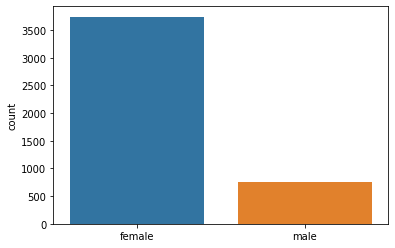

In [159]:
preds = cat.predict(testset)
pred1 = preds.flatten()
predlst = pred1.tolist()
output = pd.DataFrame({'session_id': test_df.session_id,'gender': predlst})
output.to_csv('cleaned.csv', index=False)
sns.countplot(predlst)
pd.Series(predlst).value_counts()

### Results And Analysis -------------- 

* So We Were able to Predict 3742 as females and  758 as males. Which gave us an Model Accuracy of 0.897 ! 
* During The Hackathon We got a public score of 0.86833 and Private Score as of 0.8733 fairly close. 
* The Dataset is unfairly unbalanced, Advanced Feature Engineering and Ensembling may help in Boosting the Accuracy.
* You Guys can try with Ensembling by stacking up and building a baseline Model.


#### ******************************************************** THANKS ! ***********************************************************************************